# Лабораторная работа №1. Анализ функции и графики

## Студент группы М8О-201Б-19 Ильиных В.М.

Твоя функция:
FormBox[FractionBox[RowBox[{RowBox[{"(", 

 
>           RowBox[{SuperscriptBox["x", "2"], "-", "4"}], ")"}], " ", 

 
>         RowBox[{"sin", "(", FractionBox[RowBox[{"π", " ", SuperscriptBox["x", "2"]}], 

 
>            "6"], ")"}]}], RowBox[{SuperscriptBox["x", "2"], "-", "1"}]],\
 
>    TraditionalForm]
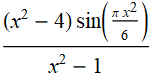

In [1]:
tasks = {
    Sin[2*x^3]^2/x^3
    , (x^2 - 4)*Sin[(Pi*(x^2))/6] / (x^2 - 1)
    , Sqrt[Abs[3*x^3 + 2*x^2 - 10*x]] / (4*x)
    , 1/2 * Log[Sqrt[x^2 + 1] / Sqrt[x^2 - 1]] - 15*x^2
    , (x^3 - x^2 - x + 1)^(1/3) / Tan[x]
    , 2*Log[(x - 1) / x] + 1
    , Log[x - 1] / (x - 1)^2
};

getVariantForNumber[number_, variationsQuo_]:=(
    Module[{t},
        t = Mod[number , variationsQuo];
        If[t != 0
                , t
                , variationsQuo
            ]
    ]
)

yourNumber = 9;
numberOfYourTask = getVariantForNumber[yourNumber, Length[tasks]];
"Твоя функция:"
f[y_] := tasks[[numberOfYourTask]]/.x->y;
f[x]//TraditionalForm

График функции:
-Graphics-
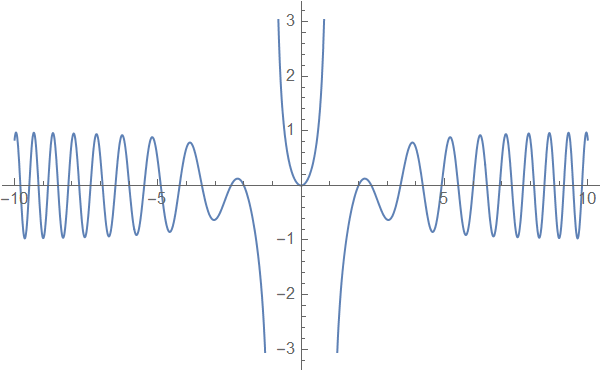

In [8]:
"График функции:"
Plot[f[x], {x, -10, 10}]

In [13]:
"Область определения: все точки, кроме"
range = Solve[x^2-1 == 0, x]

Область определения: все точки, кроме
{{x -> -1}, {x -> 1}}

In [12]:
res1 = f[x] == f[-x] //TautologyQ;
res2 = f[x] + f[-x] == 0 //TautologyQ;
If[res1 == True,"Функция четная", Null]
If[res2,"Функция нечетная", Null]
If[Not[res1||res2], "Функция прочая", Null]

Функция четная

This system cannot be solved with the methods available to Solve.: This system cannot be solved with the methods available to Solve.

2                                  2
             2      Pi x                  2      Pi (T + x)
      (-4 + x ) Sin[-----]   (-4 + (T + x) ) Sin[-----------]
                      6                               6
Solve[-------------------- - -------------------------------- == 0]
                  2                               2
            -1 + x                    -1 + (T + x)
Функция непериодична
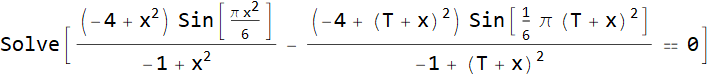

In [17]:
bla = f[x] - f[x+T];
sols = Solve[bla == 0]
eq1 = bla/. x->2 /. T->2;
eq2 = f[2];
If[eq1 == eq2, "Функция периодична", "Функция непериодична"]

Пересечение графика функции с осью абсцисс:
Таких точек бесконечно много, вот некоторые из них:

x -> 2.

x -> 2.

x -> 3.4641

x -> 4.24264

x -> 4.89898

x -> 6.

x -> 6.9282

x -> 8.12404

x -> 9.16515

x -> 10.0995

x -> 11.4891

x -> 12.

x -> 13.1909

x -> 14.0712
                -9
x -> -8.50305 10

               -9
x -> 6.02061 10

Накладываем найденные точки на график функции и видим, что практически все совпадает
Показываются не все точки. Вероятно, потому, что не хватает точности у метода FindRoot

-Graphics-
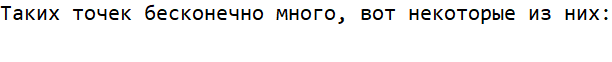
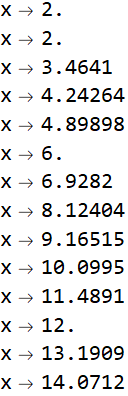
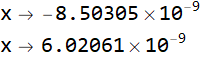
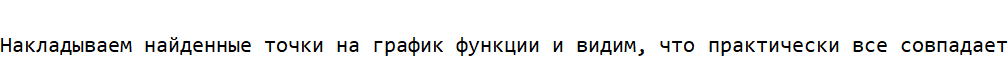
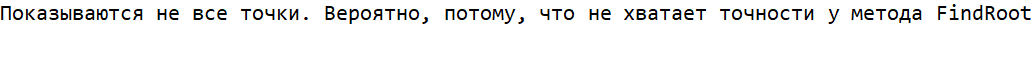
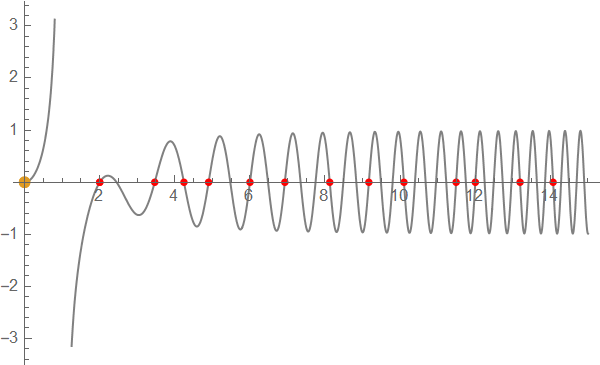

In [22]:
"Пересечение графика функции с осью абсцисс:"
"Таких точек бесконечно много, вот некоторые из них:\n"
x = . 
f= (x^2 - 4)*Sin[(Pi*(x^2))/6] / (x^2 - 1); 
sols = Table[FindRoot[f, {x, i}], {i, 1.1, 15}];
sols1 = Table[FindRoot[f, {x,i}], {i, -0.9, 0.9}];
sols//TableForm
sols1//TableForm
points = {x, 0}/.sols;
points1 = {x, 0}/.sols1;
"\nНакладываем найденные точки на график функции и видим, что практически все совпадает"
"Показываются не все точки. Вероятно, потому, что не хватает точности у метода FindRoot\n"
g1 = Plot[f, {x, 0, 15}, PlotStyle -> GrayLevel[0.5]];
g2 = ListPlot[{points, points1}, PlotStyle->{Red, PointSize[Large]}];
Show[{g1, g2}]

Промежутки знакопостоянства

По графику видно, что таких промежутков бесконечно много,
поэтому метод Reduce не сможет указать их все

Функция положительна при:
-Sqrt[6] < x < -2 || -3 Sqrt[2] < x < -2 Sqrt[3] || 2 Sqrt[3] < x < 3 Sqrt[2] || 
 
>   2 < x < Sqrt[6] || -1 < x < 0 || 0 < x < 1

Функция отрицательна при:
-2 Sqrt[3] < x < -Sqrt[6] || Sqrt[6] < x < 2 Sqrt[3] || -2 < x < -1 || 1 < x < 2
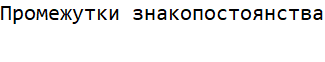
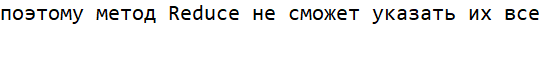
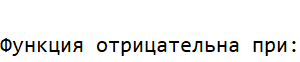

In [37]:
"Промежутки знакопостоянства\n"
"По графику видно, что таких промежутков бесконечно много,"
"поэтому метод Reduce не сможет указать их все\n"
eqplus = Reduce[f > 0, x];
eqminus = Reduce[f < 0, x];
"Функция положительна при:"
eqplus/.C[1]->1
"\nФункция отрицательна при:"
eqminus/.C[1]->1

# <span style="color:red"> Возрастание/убывание функции и точки экстремума </span>

Первая производная:
                       2                          2                2
            2      Pi x                2      Pi x             Pi x
Pi x (-4 + x ) Cos[-----]   2 x (-4 + x ) Sin[-----]   2 x Sin[-----]
                     6                          6                6
------------------------- - ------------------------ + --------------
                2                         2 2                   2
       3 (-1 + x )                 (-1 + x )              -1 + x

Решений бесконечно много, поэтому построим график и найдем несколько корней
-Graphics-

Например, вот эти три корня
{x -> 2.21885}
{x -> 3.04156}
{x -> 3.88204}

Так как это корни производной, то по знаку производной в окрестностях
этих точек можно определить возрастание/убывание исходной функции


Первая точка (первое значение - немного левее точки, второе - правее)
0.00512355
-0.00512039

Вторая точка (первое значение - немного левее точки, второе - правее)
-0.00701087
0.00702182

Третья точка (первое значение - немного левее точки, второе - правее)
0.0131519
-0.0131656

Итак, получаем следующий вывод для полученных трех корней:
(стрелочки означают убывание/возрастание функции)
-Graphics-

Вторая производная:
                    2                     2
        -2 x (-4 + x )     2 x        Pi x
2 Pi x (-------------- + -------) Cos[-----]
                 2 2           2        6
          (-1 + x )      -1 + x
-------------------------------------------- + 
                     3
 
           2                                 2                           2
       -8 x          2             2      8 x           2            Pi x
>   (---------- + ------- + (-4 + x ) (---------- - ----------)) Sin[-----] + 
            2 2         2                     2 3          2 2         6
     (-1 + x )    -1 + x               (-1 + x )    (-1 + x )
 
                          2                   2
                      Pi x       2  2     Pi x
               Pi Cos[-----]   Pi  x  Sin[-----]
           2            6                   6
    (-4 + x ) (------------- - -----------------)
                     3                 9
>   ---------------------------------------------
                             2
                       -1 + x
-Graphics-

Ранее мы нашли три точки, в который первая производная равняется нулю.
При помощи достаточного условия существования экстремума проверим, что эти точки
являются экстремумами и что все предыдущие вычисления были верными
Подставим значения потенциальных точек экстремума во вторую производную

Первая точка:
-5.12197
Точка максимума

Вторая точка:
7.01635
Точка минимума

Третья точка:
-13.1588
Точка максимума

Всё совпало => всё посчитано правильно
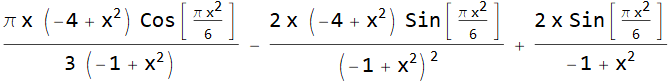
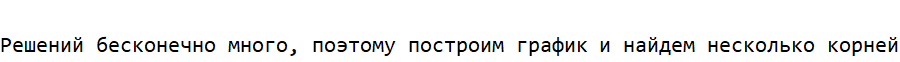
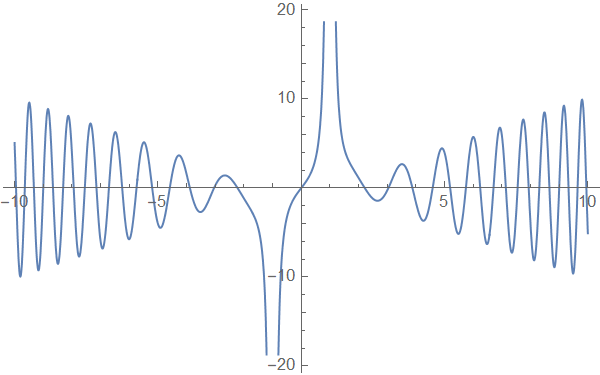
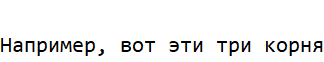
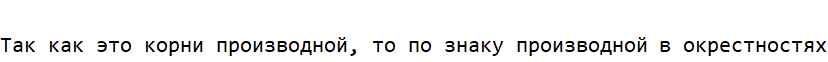
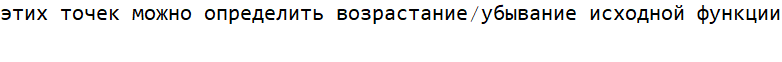
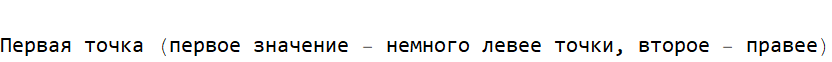
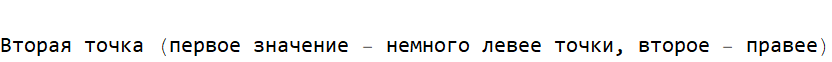
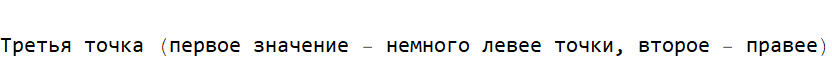
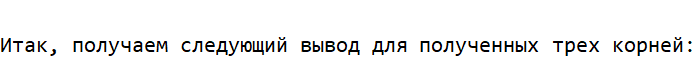
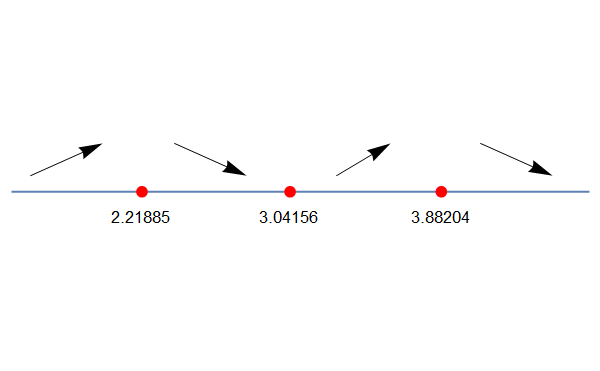
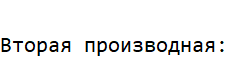
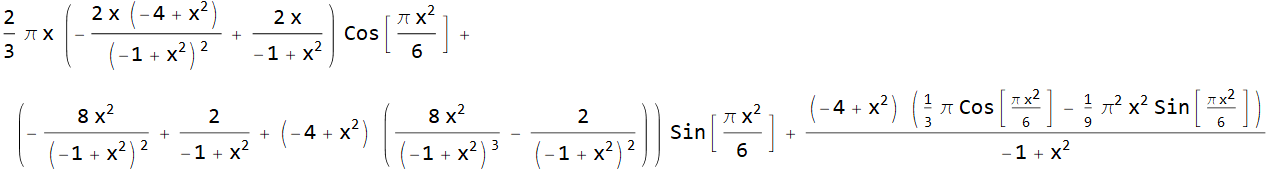
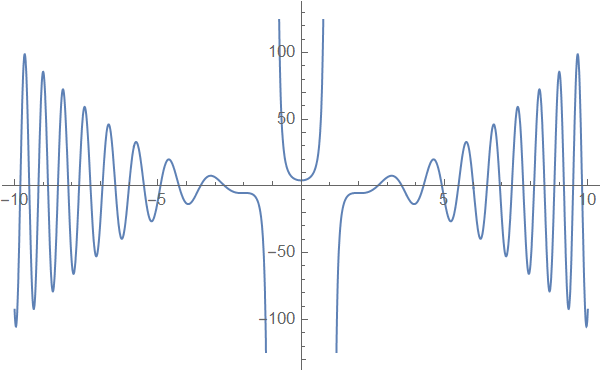
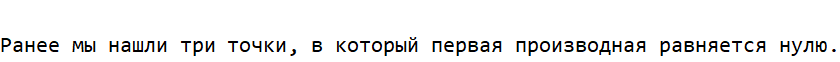
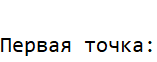
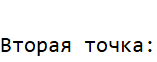
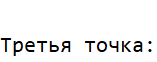
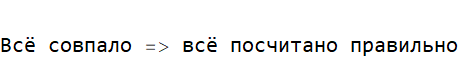

In [46]:
x = . 
f = (x^2 - 4)*Sin[(Pi*(x^2))/6] / (x^2 - 1); 
"Первая производная:"
df = D[f, x]
"\nРешений бесконечно много, поэтому построим график и найдем несколько корней"
Plot[df, {x, -10, 10}]
"\nНапример, вот эти три корня"
dsolve1 = FindRoot[df, {x, 2}]
dsolve2 = FindRoot[df, {x, 3}]
dsolve3 = FindRoot[df, {x, 4}]
"\nТак как это корни производной, то по знаку производной в окрестностях" 
"этих точек можно определить возрастание/убывание исходной функции\n"

tmp = x/.dsolve1;
tmpmin = tmp - 0.001;
tmpplus = tmp + 0.001;
"\nПервая точка (первое значение - немного левее точки, второе - правее)"
res1 = df/.x->tmpmin
res2 = df/.x->tmpplus

tmp = x/.dsolve2;
tmpmin = tmp - 0.001;
tmpplus = tmp + 0.001;
"\nВторая точка (первое значение - немного левее точки, второе - правее)"
res1 = df/.x->tmpmin
res2 = df/.x->tmpplus

tmp = x/.dsolve3;
tmpmin = tmp - 0.001;
tmpplus = tmp + 0.001;
"\nТретья точка (первое значение - немного левее точки, второе - правее)"
res1 = df/.x->tmpmin
res2 = df/.x->tmpplus
"\nИтак, получаем следующий вывод для полученных трех корней:"
"(стрелочки означают убывание/возрастание функции)"
point1 = {x,0}/.dsolve1;
point2 = {x,0}/.dsolve2;
point3 = {x,0}/.dsolve3;
gr1 = Plot[Labeled[0, {"2.21885", "3.04156", "3.88204"}, 
        {{2.21885, -0.1}, {3.04156, -0.1}, {3.88204, -0.1}}], {x, 1.5, 4.7}, Axes -> {False, False}];
gr2 = ListPlot[{point1, point2, point3}, PlotStyle->{Red, PointSize[Large]}];
arr1 = Graphics[Arrow[{{1.6, 0.1}, {2, 0.3}}]];
arr2 = Graphics[Arrow[{{2.4, 0.3}, {2.8, 0.1}}]];
arr3 = Graphics[Arrow[{{3.3, 0.1}, {3.6, 0.3}}]];
arr4 = Graphics[Arrow[{{4.1, 0.3}, {4.5, 0.1}}]];

Show[{gr1, gr2, arr1, arr2, arr3, arr4}]
"\nВторая производная:"
d2f = D[f,{x,2}]
Plot[d2f, {x, -10, 10}]
"\nРанее мы нашли три точки, в который первая производная равняется нулю."
"При помощи достаточного условия существования экстремума проверим, что эти точки"
"являются экстремумами и что все предыдущие вычисления были верными"
"Подставим значения потенциальных точек экстремума во вторую производную"

"\nПервая точка:"
res1 = d2f/.dsolve1
If[res1 < 0, "Точка максимума", "Точка минимума"]
"\nВторая точка:"
res2 = d2f/.dsolve2
If[res2 < 0, "Точка максимума", "Точка минимума"]
"\nТретья точка:"
res3 = d2f/.dsolve3
If[res3 < 0, "Точка максимума", "Точка минимума"]

If[res1 < 0 && res2 > 0 && res3 < 0, "\nВсё совпало => всё посчитано правильно", "\nУпс. Где-то ошибка"]

# <span style="color:red"> Непрерывность. Точки разрыва и их классификация </span>

На области определения функция непрерывна. Рассмотрим точки  x =− 1  и  x = 1
Сначала проверим в точке  x = −1
Infinity
-Infinity
Значит, неустранимый разрыва 2 рода

В точке х = 1:
-Infinity
Infinity
И это тоже неустранимый разрыв 2 рода
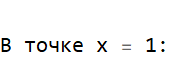

In [105]:
"На области определения функция непрерывна. Рассмотрим точки  x =− 1  и  x = 1" 
"Сначала проверим в точке  x = −1"
x = . 
f = (x^2 - 4)*Sin[(Pi*(x^2))/6] / (x^2 - 1); 
Limit[f, x->-1, Direction -> "FromAbove"]
Limit[f, x->-1, Direction -> "FromBelow"]
"Значит, неустранимый разрыва 2 рода"
"\nВ точке х = 1:"
Limit[f, x->1, Direction -> "FromAbove"]
Limit[f, x->1, Direction -> "FromBelow"]
"И это тоже неустранимый разрыв 2 рода"

In [ ]:
"Найдем асимптоты"
Limit[f/x, x->Infinity]
Limit[f, x->Infinity]
"\nНаклонных асимптот нет." 
"Получается, функция имеет две вертикальные асимптоты  x=−1  и  x=1"
"\nПостроим график с асимптотами:"
Plot[f, {x, -10, 10}, Exclusions->{-1,1}, ExclusionsStyle->Dashing[Small]]